In [1]:
import geopandas as gpd
import pandas as pd
from shapely.geometry import Point, LineString,MultiLineString
import numpy as np

import osmnx as ox
import networkx as nx

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Primero creamos un dataset para testear
#formato google maps latlong, yx
obelisco = (-34.60377,-58.38161)
retiro = (-34.591372, -58.374261)
once = (-34.608315, -58.406169)
constitucion = (-34.627554, -58.380690)

In [3]:
nx.read_graphml?

In [4]:
G = ox.load_graphml(filename='caba_callejero.graphml',folder='../carto')

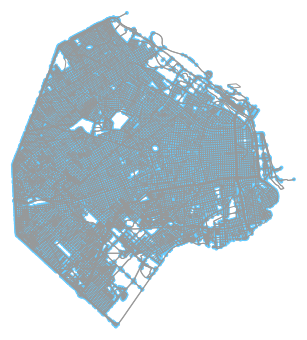

In [5]:
fig, ax = ox.plot_graph(G)

In [6]:
edges = ox.graph_to_gdfs(G, nodes=False).set_index(['u', 'v']).sort_index()
edges

key                                              osmid  \
u          v                                                                    
32375714   2353040245    0         [4927924, 291271628, 291271630, 298729190]   
           2353040252    0  [510337894, 226508754, 483593874, 226508757, 2...   
32375722   249843551     0  [55594689, 55594692, 298463830, 55594679, 2365...   
           2863382401    0                                          282427419   
32376375   32376376      0                  [279816864, 279816868, 279816871]   
...                    ...                                                ...   
6956531758 218007968     0                                          743187008   
           2149986270    0                                          743187012   
6956531759 218007968     0                                          743187010   
           2149986270    0                                           20427513   
7023042808 4581629795    0                                          751217850   

                       oneway                 name         highway maxspeed  \
u          v                                                                  
32375714   2353040245    True  Avenida General Paz        motorway       60   
           2353040252    True                  NaN   motorway_link       40   
32375722   249843551     True  Avenida General Paz        motorway       80   
           2863382401    True                  NaN   motorway_link       40   
32376375   32376376      True  Avenida General Paz        motorway       80   
...                       ...                  ...             ...      ...   
6956531758 218007968     True               Osorio     residential       40   
           2149986270    True    Avenida Garmendia  secondary_link       40   
6956531759 218007968     True               Osorio     residential       40   
           2149986270    True               Osorio  secondary_link       40   
7023042808 4581629795   False             Fournier     residential       40   

                        length  \
u          v                     
32375714   2353040245  407.540   
           2353040252  427.477   
32375722   249843551   751.698   
           2863382401  326.137   
32376375   32376376    158.483   
...                        ...   
6956531758 218007968    13.106   
           2149986270   17.410   
6956531759 218007968    13.149   
           2149986270   17.238   
7023042808 4581629795   42.764   

                                                                geometry  \
u          v                                                               
32375714   2353040245  LINESTRING (-58.49303 -34.54664, -58.49336 -34...   
           2353040252  LINESTRING (-58.49303 -34.54664, -58.49337 -34...   
32375722   249843551   LINESTRING (-58.50775 -34.56619, -58.50799 -34...   
           2863382401  LINESTRING (-58.50775 -34.56619, -58.50810 -34...   
32376375   32376376    LINESTRING (-58.52865 -34.65308, -58.52854 -34...   
...                                                                  ...   
6956531758 218007968   LINESTRING (-58.46527 -34.59501, -58.46533 -34...   
           2149986270  LINESTRING (-58.46527 -34.59501, -58.46528 -34...   
6956531759 218007968   LINESTRING (-58.46545 -34.59513, -58.46541 -34...   
           2149986270  LINESTRING (-58.46545 -34.59513, -58.46536 -34...   
7023042808 4581629795  LINESTRING (-58.41846 -34.64935, -58.41844 -34...   

                      lanes junction bridge     ref tunnel service width  \
u          v                                                               
32375714   2353040245     2      NaN    yes  RNA001    NaN     NaN   NaN   
           2353040252     2      NaN    yes     NaN    NaN     NaN   NaN   
32375722   249843551      4      NaN    yes  RNA001    NaN     NaN   NaN   
           2863382401     2      NaN    NaN     NaN    NaN     NaN   NaN   
32376375   32376376       3      NaN    yes  RNA001  

In [105]:
edges.highway.map(str).value_counts()

residential                            25607
secondary                               6801
tertiary                                1675
primary                                 1327
motorway_link                            424
living_street                            352
unclassified                             326
secondary_link                           286
motorway                                 271
trunk                                     66
primary_link                              37
tertiary_link                             17
trunk_link                                 9
['residential', 'living_street']           8
crossing                                   6
['residential', 'tertiary']                5
['residential', 'unclassified']            4
['secondary', 'motorway_link']             2
['motorway', 'motorway_link']              2
['secondary_link', 'residential']          2
['road', 'living_street']                  2
disused                                    1
['resident

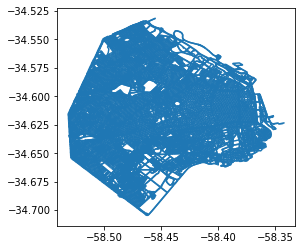

In [7]:
edges.plot()

In [8]:
origin = once
destination = obelisco

In [9]:
# busco el nodo mas cercano de ambos puntos 
orig_node = ox.get_nearest_node(G, origin)
dest_node = ox.get_nearest_node(G, destination)

In [10]:
route = nx.shortest_path(G, orig_node, 
                         dest_node)

In [11]:
route

[1268373211,
 1268373207,
 81551274,
 81551273,
 199483132,
 60636576,
 196222690,
 195898445,
 195573170,
 195769554,
 195898424,
 6401393991,
 6401393990,
 6401393988,
 6383087156,
 6383087155,
 6383087154,
 3407651880,
 6383087152,
 6383087151,
 1957855912,
 4466595797,
 246724132]

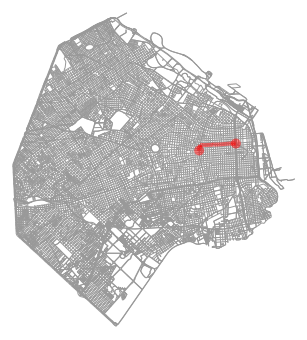

In [12]:
fig, ax = ox.plot_graph_route(G, route, node_size=0)

In [13]:
G.nodes[1268373211]

{'y': -34.6077521,
 'x': -58.4061179,
 'osmid': 1268373211,
 'highway': 'traffic_signals'}

In [14]:
route_pairwise = zip(route[:-1], route[1:])

tramos_unicos = [edges.loc[uv, 'osmid'].iloc[0] for uv in route_pairwise]



In [15]:
tramos_unicos

[48098623,
 126149611,
 124916010,
 124916012,
 566501634,
 124916011,
 124916011,
 124916011,
 124916011,
 124916011,
 683440011,
 683440011,
 683440011,
 683440012,
 684889563,
 684889565,
 684889569,
 684889571,
 684889573,
 [684889576, 681596396],
 275088545,
 [325838312, 275088545]]

array(['48098623', '126149611', '124916010', '124916012', '566501634',
       '124916011', '683440011', '683440012', '684889563', '684889565',
       '684889569', '684889571', '684889573', '[684889576, 681596396]',
       '275088545', '[325838312, 275088545]'], dtype=object)

In [ ]:
route_pairwise = zip(route[:-1], route[1:])
lines = [edges.loc[uv, 'geometry'].iloc[0] for uv in route_pairwise]
lines

In [ ]:
MultiLineString(lines)

In [79]:
def convertir_OD_en_ruta(o_latlong,d_latlong,tipo,G=G,edges=edges,plot=False):
    # busco el nodo mas cercano de ambos puntos 
    orig_node = ox.get_nearest_node(G, o_latlong)
    dest_node = ox.get_nearest_node(G, d_latlong)
    
    #obtengo la ruta
    route = nx.shortest_path(G, orig_node, 
                         dest_node)
    
    #nodos en pares
    route_pairwise = zip(route[:-1], route[1:])
    if plot:
        fig, ax = ox.plot_graph_route(G, route, node_size=0)
    if tipo == 'arcos':
        tramos_unicos = [edges.loc[uv, 'osmid'].iloc[0] for uv in route_pairwise]
        tramos_unicos = pd.Series(tramos_unicos).map(str).unique()
        
        return tramos_unicos
    elif tipo == 'linea':
        lines = [edges.loc[uv, 'geometry'].iloc[0] for uv in route_pairwise]
        
        return MultiLineString(lines)
    else:
        return None

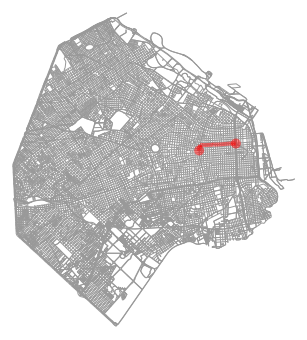

array(['48098623', '126149611', '124916010', '124916012', '566501634',
       '124916011', '683440011', '683440012', '684889563', '684889565',
       '684889569', '684889571', '684889573', '[684889576, 681596396]',
       '275088545', '[325838312, 275088545]'], dtype=object)

In [70]:
convertir_OD_en_ruta(o_latlong = once,d_latlong = obelisco,tipo='arcos',G=G,edges=edges,plot=True)

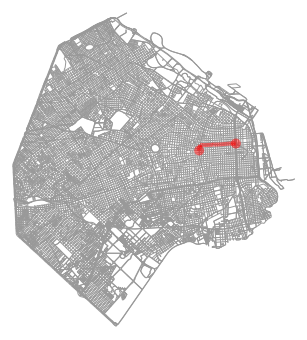

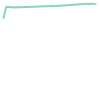

In [71]:
convertir_OD_en_ruta(o_latlong = once,d_latlong = obelisco,tipo='linea',G=G,edges=edges,plot=True)

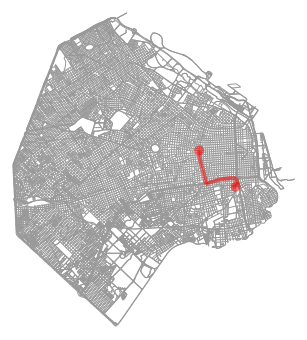

array(['48098626', '[240589761, 46930406]', '130351681', '20280332',
       '47099083', '333373302', '48395668', '22031718', '447506859',
       '222382835', '273892889', '273830331', '532250936', '647946355',
       '647946356', '[273892901, 50417423]', '222380082',
       '[686011050, 222380082]', '98117690', '22968038', '623832948',
       '[23047603, 23047605]', '23047604',
       '[628724632, 628724634, 47014548]', '47521386',
       '[136104184, 319331431]', '48024269'], dtype=object)

In [72]:
convertir_OD_en_ruta(o_latlong = once,d_latlong = constitucion,tipo='arcos',G=G,edges=edges)

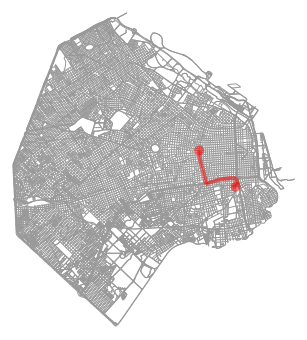

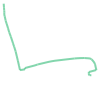

In [73]:
convertir_OD_en_ruta(o_latlong = once,d_latlong = constitucion,tipo='linea',G=G,edges=edges,plot=True)